In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from pathlib import Path
import pandas as pd
import numpy as np
from utils import unify_coordinates_referential, init_logger, verify_dotenv_file
from utils import GOAL_POSITION
from feature_engineering import *
from matplotlib.colors import ListedColormap

Loading .env file from c:\Users\Utilisateur\Documents\MILA\IFT 6758\IFT6758_NHL

In [2]:
data = pd.read_csv(Path(os.environ["DATA_FOLDER"], "2016_2020_data_f19a07b.csv"))

In [3]:
data = NHLFeatureEngineering(
    df = data,
    distanceToGoal= True,
    angleToGoal= True,
    isGoal= True,
    emptyNet= True,
    verbose= True,
    inputRinkSide= True,
    seconds= True,
    lastEventFeatures= True,
    rebound= True,
    changeOfAngle= True,
    speed= True,
)

all_data = data.df
unify_data = data.dfUnify

2023-11-09 17:31:23.535 | INFO     | feature_engineering:__init__:32 - Calculations of distance/angle done w.r.t GOAL_POSITION = [89, 0]
2023-11-09 17:31:23.677 | INFO     | feature_engineering:_printNaStatsBeforeUnifying:105 - Found 387812 shots with coordinates and rinkSide specified.
2023-11-09 17:31:23.678 | INFO     | feature_engineering:_printNaStatsBeforeUnifying:110 - 
                Coordinates NA stats:
                    17 shots without coordinates.
                    14 shots without both X and Y coordinates.
                    2 shots without X coordinates.
                    1 shots without Y coordinates.
                
                RinkSide NA stats:
                    11401 shots without rinkSide specified. Use inputRinkSide == True to handle missing 
                    values based on mean X coordinates in a period for a given team and gameId.

                ROWS WITH MISSING COORDINATES ARE DROPPED IN THE UNIFIED DATAFRAME.
            
2023-11-09 17:31

# Histogramme du nombre de tirs (buts et non-buts séparés), regroupées (binned) par distance

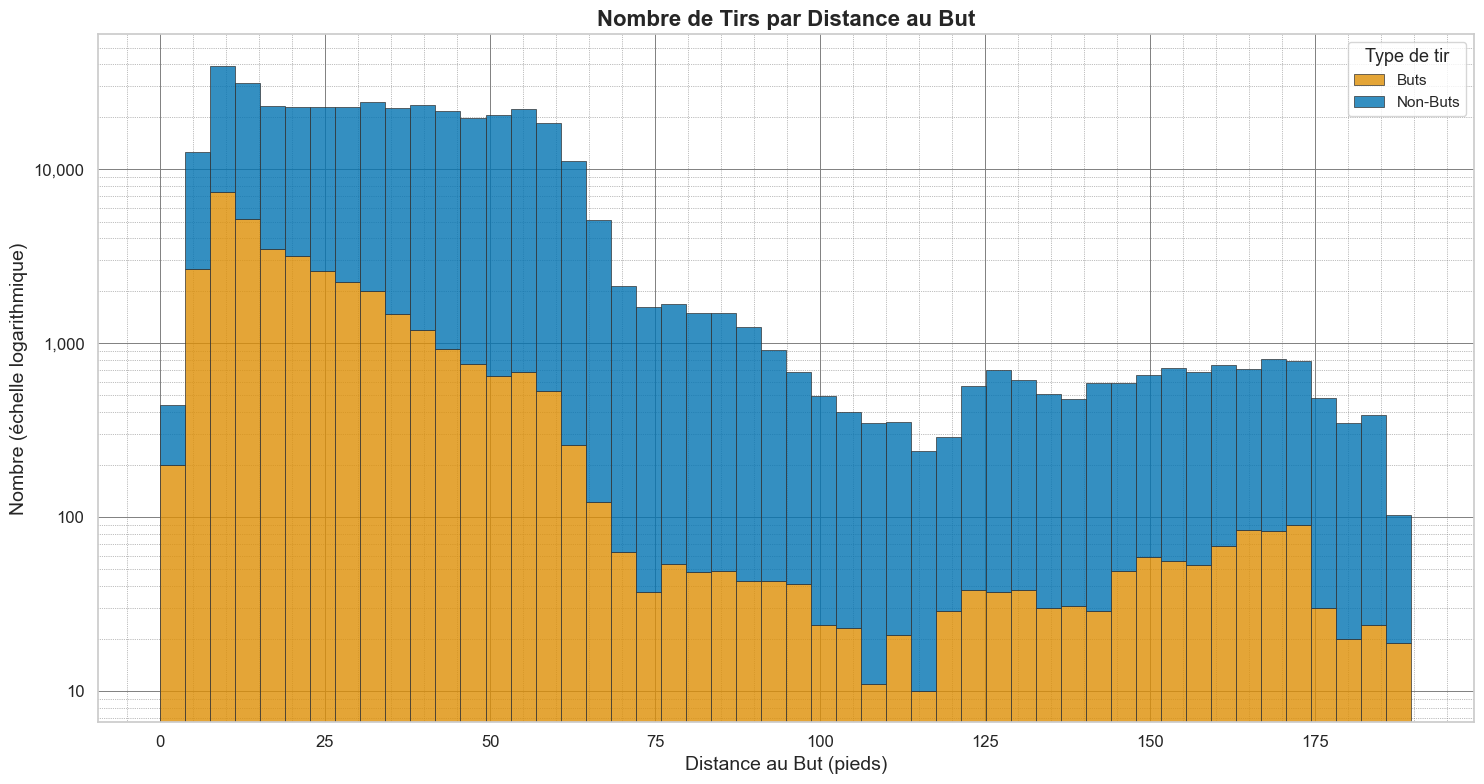

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import warnings

warnings.filterwarnings("ignore")

# Setting the aesthetic style of the plots
sns.set(style="whitegrid")

# Create a color palette that is colorblind friendly
palette = sns.color_palette("colorblind")

# Create a figure and an axis
plt.figure(figsize=(15, 8))

# Create a histogram with a hue and colorblind-friendly palette
ax = sns.histplot(
    data=unify_data, 
    x='distanceToGoal', 
    hue='isGoal', 
    bins=50, 
    multiple='stack', 
    palette=palette,  # Apply the colorblind-friendly palette here
    edgecolor='0.2',
    linewidth=0.5,
    alpha=0.8
)

ax.legend(labels=["Buts", "Non-Buts"], title='Type de tir', title_fontsize='13', fontsize='11')

# Add major and minor grid lines
ax.grid(which='major', color='grey', linewidth=0.7)
ax.grid(which='minor', color='grey', linestyle=':', linewidth=0.5)
ax.minorticks_on()

# Adjust y-axis scale to symlog due to large range of y-values
ax.set_yscale('log')

# Adding some labels and title with French translations
ax.set_title('Nombre de Tirs par Distance au But', fontsize=16, fontweight='bold')
ax.set_xlabel('Distance au But (pieds)', fontsize=14)
ax.set_ylabel('Nombre (échelle logarithmique)', fontsize=14)

# Setting the x and y axis labels formats using French locale style if necessary
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

# Set the tick parameters for axes
ax.tick_params(axis='both', which='major', labelsize=12)

# Display the plot
plt.tight_layout()  # Adjust the padding between and around subplots.
plt.show()

# Un histogramme de nombre de tirs (buts et non-buts séparés), binned par angle

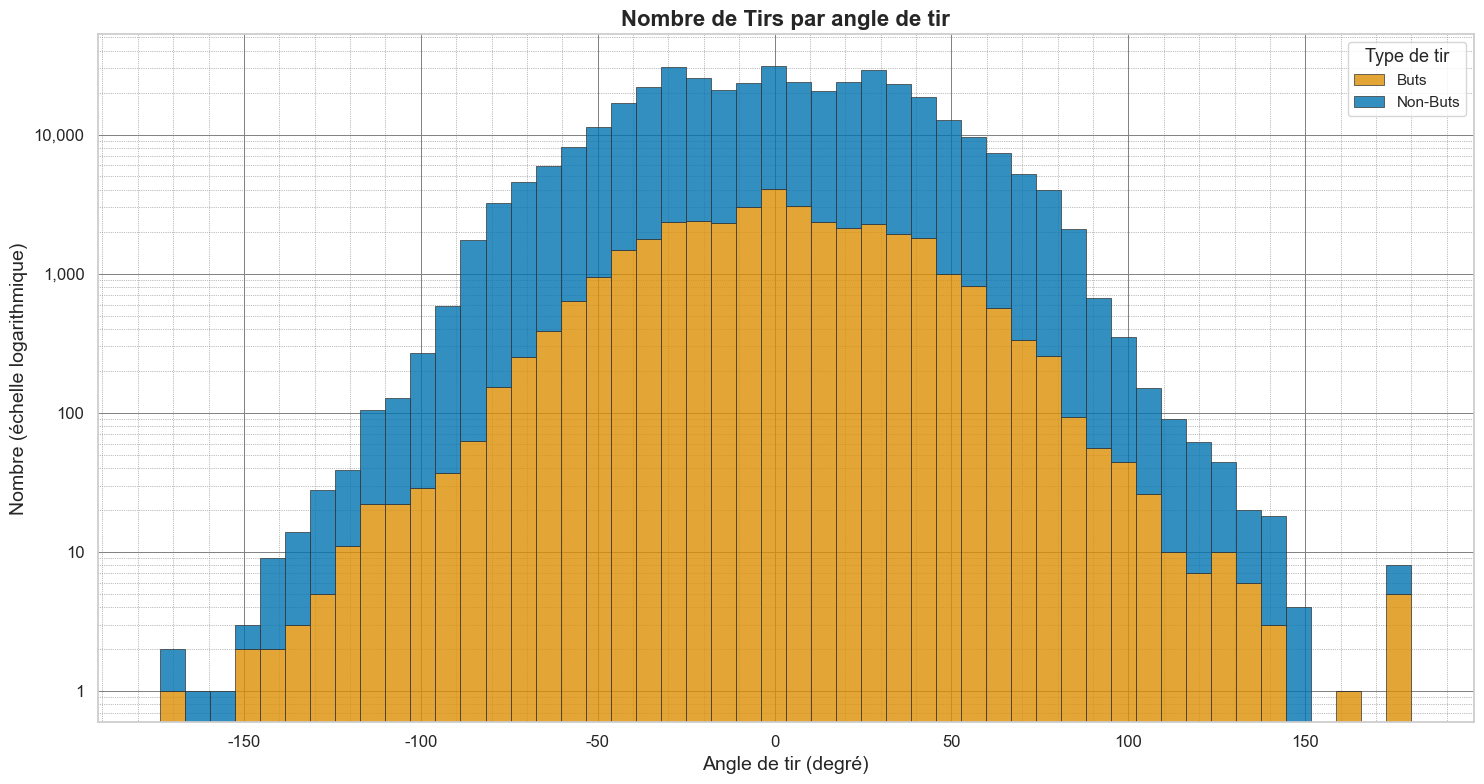

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import warnings

warnings.filterwarnings("ignore")

# Assuming your dataframe is named data

# Setting the aesthetic style of the plots
sns.set(style="whitegrid")

# Create a color palette that is colorblind friendly
palette = sns.color_palette("colorblind")

# Create a figure and an axis
plt.figure(figsize=(15, 8))

# Create a histogram with a hue and colorblind-friendly palette
ax = sns.histplot(
    data=unify_data, 
    x='angleToGoal', 
    hue='isGoal', 
    bins=50, 
    multiple='stack', 
    palette=palette,  # Apply the colorblind-friendly palette here
    edgecolor='0.2',
    linewidth=0.5,
    alpha=0.8
)

ax.legend(labels=["Buts", "Non-Buts"], title='Type de tir', title_fontsize='13', fontsize='11')

# Add major and minor grid lines
ax.grid(which='major', color='grey', linewidth=0.7)
ax.grid(which='minor', color='grey', linestyle=':', linewidth=0.5)
ax.minorticks_on()

# Adjust y-axis scale to symlog due to large range of y-values
ax.set_yscale('log')

# Adding some labels and title with French translations
ax.set_title('Nombre de Tirs par angle de tir', fontsize=16, fontweight='bold')
ax.set_xlabel('Angle de tir (degré)', fontsize=14)
ax.set_ylabel('Nombre (échelle logarithmique)', fontsize=14)

# Setting the x and y axis labels formats using French locale style if necessary
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

# Set the tick parameters for axes
ax.tick_params(axis='both', which='major', labelsize=12)

# Display the plot
plt.tight_layout()  # Adjust the padding between and around subplots.
plt.show()

# Histogramme 2D où un axe est la distance et l'autre est l'angle. Vous n'avez pas besoin de séparer les buts et les non-buts.

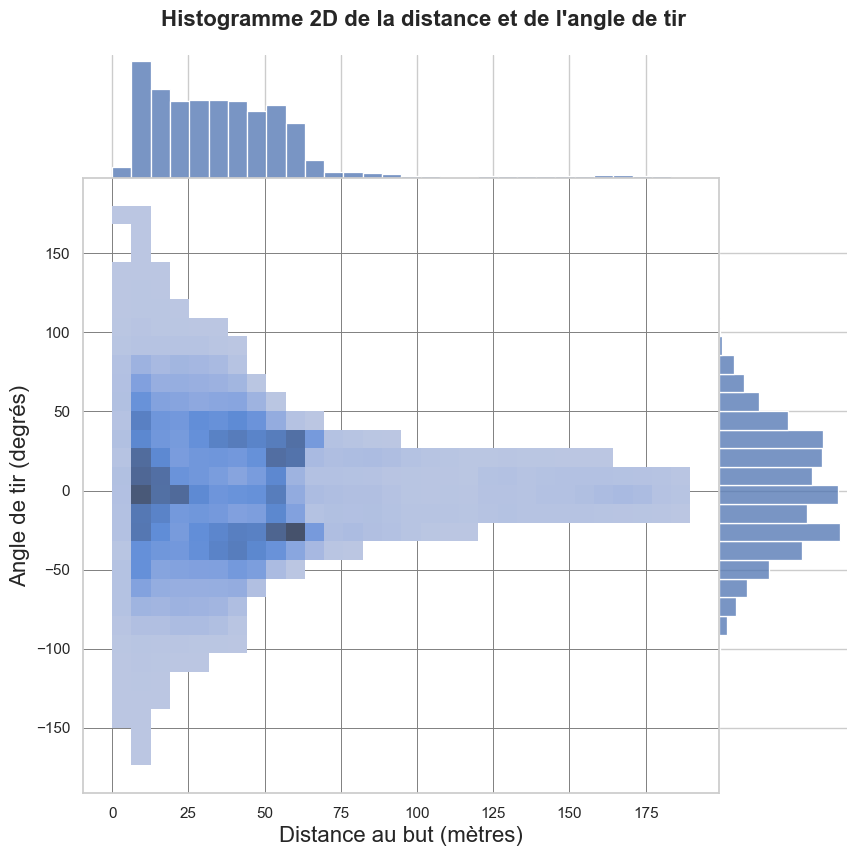

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

# Assuming your dataframe is named 'data'
# And the 'angle_to_goal' and 'distance_to_goal' columns contain the relevant information

# Setting the aesthetic style of the plots
sns.set(style="whitegrid")

palette = sns.color_palette("colorblind")

# Create a jointplot with 'distance_to_goal' on x-axis and 'angle_to_goal' on y-axis
joint_plot = sns.jointplot(
    data=unify_data,
    x='distanceToGoal',
    y='angleToGoal',
    kind="hist",  # Specifies a 2D histogram
    bins=30,  # Number of bins can be adjusted
    palette=palette,  # Use the pastel colormap
    space=0,  # Space between the joint and marginal plots
    marginal_kws=dict(bins=30, fill=True),
)

# Enhance the main title and axis labels
joint_plot.set_axis_labels('Distance au but (mètres)', 'Angle de tir (degrés)', fontsize=16)
joint_plot.fig.suptitle('Histogramme 2D de la distance et de l\'angle de tir', fontsize=16, fontweight='bold')

# Set grid style
joint_plot.ax_joint.grid(which='major', color='grey', linewidth=0.7)
joint_plot.ax_joint.grid(which='minor', color='grey', linestyle=':', linewidth=0.5)

# Set figure size
joint_plot.fig.set_size_inches(9, 9)

# Adjust the figure height and the space at the top to accommodate the suptitle
joint_plot.fig.subplots_adjust(top=0.93)  # Reduce plot to make room

# Display the plot
plt.show()

# Taux de but par rapport à la distance et à l'angle du tir

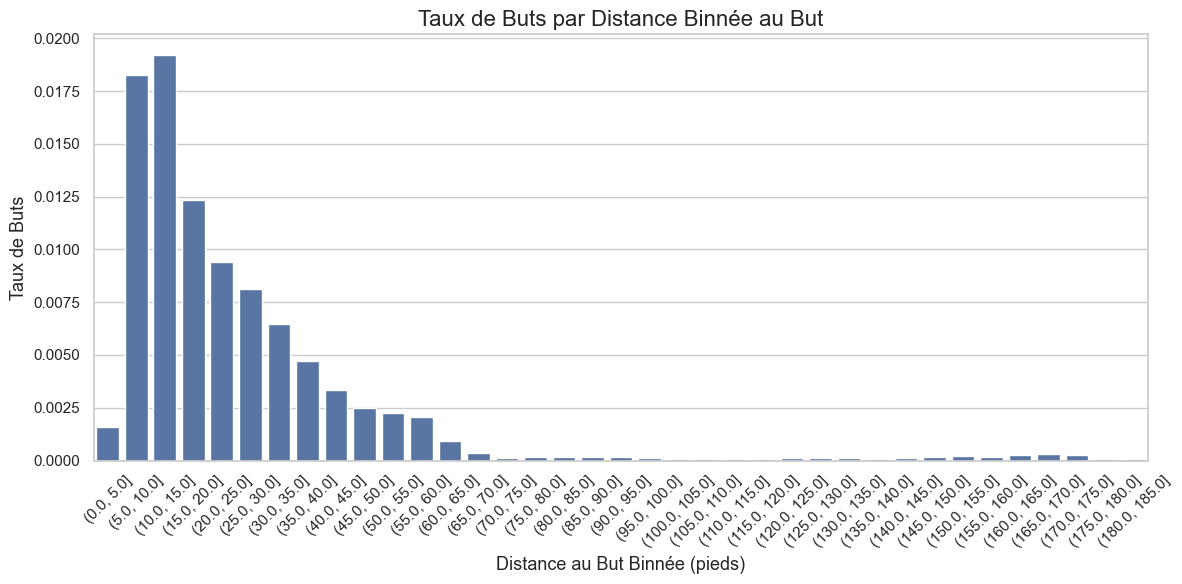

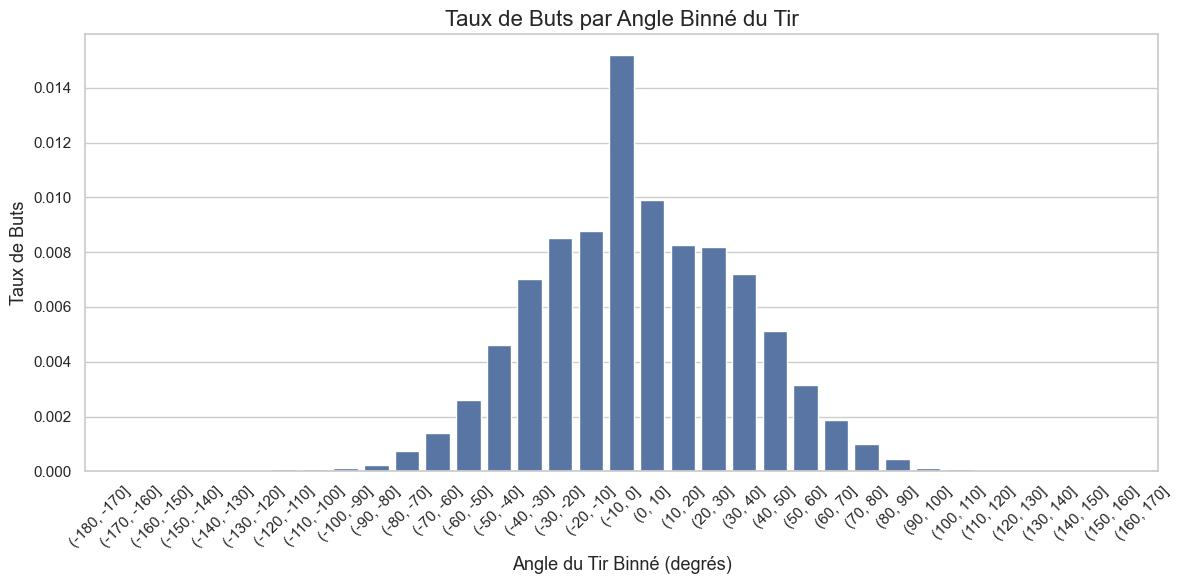

In [7]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Binning the distance and angle into discrete intervals
# Choisissez le nombre de bacs en fonction de la distribution et de la granularité des données
distance_bins = pd.cut(unify_data['distanceToGoal'], bins=np.arange(0, unify_data['distanceToGoal'].max(), 5))
angle_bins = pd.cut(unify_data['angleToGoal'], bins=np.arange(-180, 180, 10))

# Calculate the goal rate for each binned group
unify_data['distanceBin'] = distance_bins
unify_data['angleBin'] = angle_bins
distance_goal_rate = (unify_data.groupby('distanceBin')['isGoal'].sum()/unify_data.shape[0]).reset_index()
angle_goal_rate = (unify_data.groupby('angleBin')['isGoal'].sum()/unify_data.shape[0]).reset_index()

# Plot for Goal Rate vs. Binned Distance
plt.figure(figsize=(12, 6))
sns.barplot(x='distanceBin', y='isGoal', data=distance_goal_rate)
plt.xticks(rotation=45)
plt.title('Taux de Buts par Distance Binnée au But', fontsize=16)
plt.xlabel('Distance au But Binnée (pieds)', fontsize=13)
plt.ylabel('Taux de Buts', fontsize=13)
plt.tight_layout()
plt.show()

# Plot for Goal Rate vs. Binned Angle
plt.figure(figsize=(12, 6))
sns.barplot(x='angleBin', y='isGoal', data=angle_goal_rate)
plt.xticks(rotation=45)
plt.title('Taux de Buts par Angle Binné du Tir', fontsize=16)
plt.xlabel('Angle du Tir Binné (degrés)', fontsize=13)
plt.ylabel('Taux de Buts', fontsize=13)
plt.tight_layout()
plt.show()

unify_data.drop(columns=['distanceBin', 'angleBin'], inplace=True)

# Vérification données ont du sens

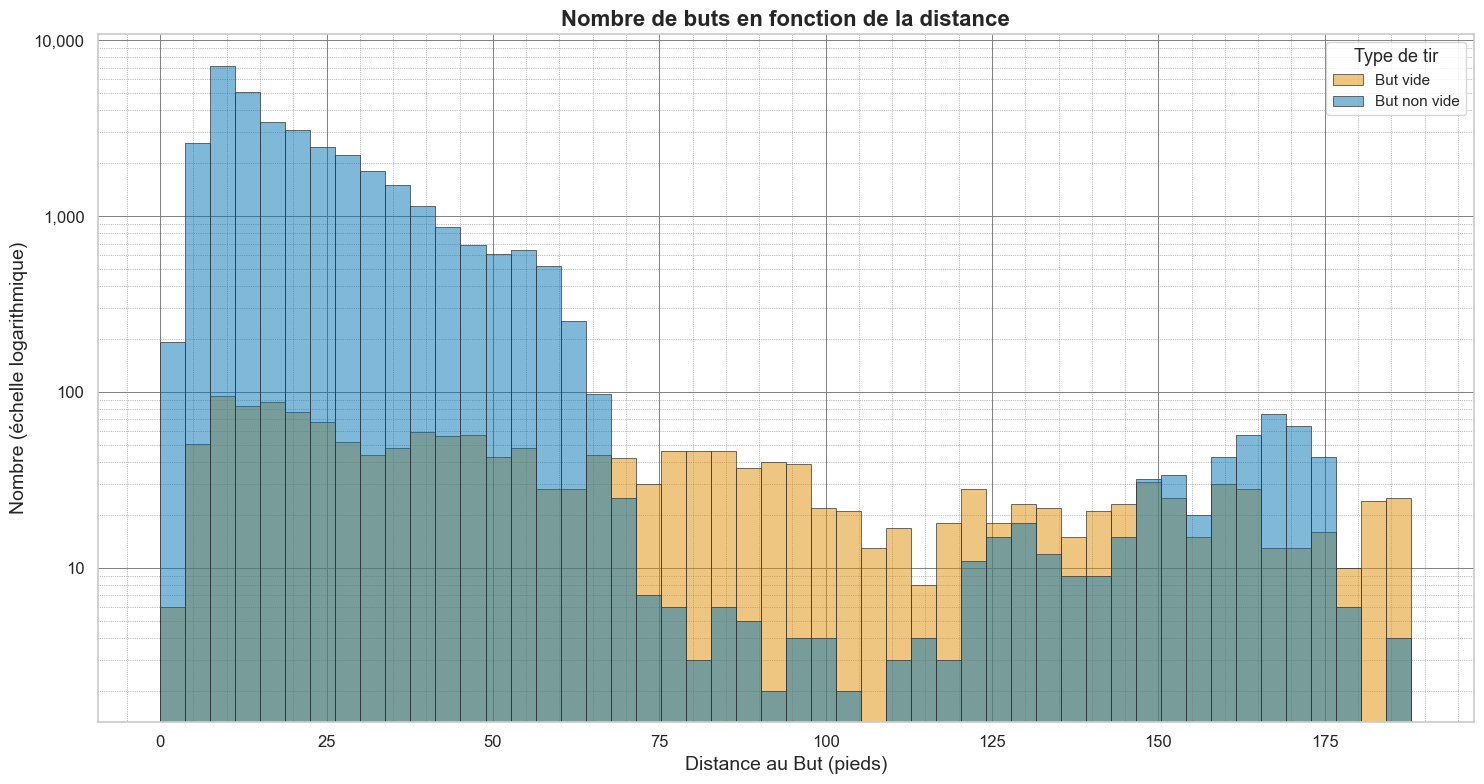

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import warnings

warnings.filterwarnings("ignore")

# Setting the aesthetic style of the plots
sns.set(style="whitegrid")

# Create a color palette that is colorblind friendly
palette = sns.color_palette("colorblind")

# Create a figure and an axis
plt.figure(figsize=(15, 8))

# Create a histogram with a hue and colorblind-friendly palette
ax = sns.histplot(
    data=unify_data[unify_data["eventType"] == "GOAL"], 
    x='distanceToGoal', 
    hue='emptyNet', 
    bins=50, 
    multiple='layer', 
    palette=palette,  # Apply the colorblind-friendly palette here
    edgecolor='0.2',
    linewidth=0.5,
    alpha=0.5
)

ax.legend(labels=["But vide", "But non vide"], title='Type de tir', title_fontsize='13', fontsize='11')

# Add major and minor grid lines
ax.grid(which='major', color='grey', linewidth=0.7)
ax.grid(which='minor', color='grey', linestyle=':', linewidth=0.5)
ax.minorticks_on()

# Adjust y-axis scale to symlog due to large range of y-values
ax.set_yscale('log')

# Adding some labels and title with French translations
ax.set_title('Nombre de buts en fonction de la distance', fontsize=16, fontweight='bold')
ax.set_xlabel('Distance au But (pieds)', fontsize=14)
ax.set_ylabel('Nombre (échelle logarithmique)', fontsize=14)

# Setting the x and y axis labels formats using French locale style if necessary
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

# Set the tick parameters for axes
ax.tick_params(axis='both', which='major', labelsize=12)

# Display the plot
plt.tight_layout()  # Adjust the padding between and around subplots.
plt.show()

# Analyse des buts net non vides

### Quelques exemples de buts net non vides

In [9]:
# La zone défensive est la 
outliers = unify_data.query("eventType == 'GOAL' & emptyNet == False & coordinateX < 0")
print("Proportion de buts net non vide par rapport à l'ensemble de données :", (len(outliers)/len(unify_data)) * 100, "%")
print("En voici quelques exemples :")
outliers.head(10)

Proportion de buts net non vide par rapport à l'ensemble de données : 0.12583416707064246 %
En voici quelques exemples :


,gameId,season,gameType,gameDate,homeTeam,awayTeam,rinkSide,period,periodTime,byTeam,...,periodTimeSeconds,LastEventType,LastCoordinateX,LastCoordinateY,LastAngleToGoal,timeElapsed,distanceFromLastEvent,isRebound,changeOfAngle,speed
577,2016020009,2016,R,2016-10-13,TBL,DET,left,3,17:55,DET,...,1075,SHOT,-62.0,-36.0,-53.130102,14.0,NaN,1,40.601295,0.0
1806,2016020030,2016,R,2016-10-16,NYI,ANA,left,3,07:59,NYI,...,479,SHOT,74.0,-9.0,30.963757,0.0,NaN,1,21.197077,0.0
1842,2016020031,2016,R,2016-10-16,EDM,BUF,left,2,03:53,BUF,...,233,SHOT,-70.0,0.0,0.000000,47.0,NaN,1,7.199234,0.0
4588,2016020077,2016,R,2016-10-23,WPG,EDM,left,2,09:24,EDM,...,564,SHOT,35.0,24.0,10.954063,115.0,NaN,1,11.648523,0.0
4592,2016020077,2016,R,2016-10-23,WPG,EDM,left,2,11:10,EDM,...,670,SHOT,-34.0,4.0,-1.862621,32.0,NaN,1,0.863690,0.0
4598,2016020077,2016,R,2016-10-23,WPG,EDM,left,2,17:16,EDM,...,1036,SHOT,82.0,-7.0,-2.344132,121.0,NaN,1,3.296417,0.0
20743,2016020342,2016,R,2016-12-01,NYI,PIT,left,2,02:10,NYI,...,130,SHOT,-72.0,0.0,0.000000,1.0,NaN,1,7.236922,0.0
20777,2016020342,2016,R,2016-12-01,NYI,PIT,left,3,13:08,PIT,...,788,SHOT,64.0,-1.0,2.290610,78.0,NaN,1,7.926551,0.0
21229,2016020349,2016,R,2016-12-02,OTT,PHI,left,4,00:40,PHI,...,40,SHOT,53.0,25.0,-34.777831,NaN,NaN,1,30.692215,0.0
22638,2016020372,2016,R,2016-12-04,NYI,DET,left,3,15:39,NYI,...,939,SHOT,70.0,-4.0,11.888658,0.0,NaN,1,13.583305,0.0


### Analyse d'un cas particulier pour la partie 2020020369 (gameId)

Si l'entrée est véridique, cela impliquerait que Corey Perry a marqué un but dans un but non vide, gardé par Connor Hellebuyck, à plus de 170 pieds du but.

In [10]:
outliers.query("gameId == 2020020369")

,gameId,season,gameType,gameDate,homeTeam,awayTeam,rinkSide,period,periodTime,byTeam,...,periodTimeSeconds,LastEventType,LastCoordinateX,LastCoordinateY,LastAngleToGoal,timeElapsed,distanceFromLastEvent,isRebound,changeOfAngle,speed
352514,2020020369,2020,R,2021-03-05,MTL,WPG,left,3,18:36,MTL,...,1116,SHOT,-78.0,0.0,0.0,21.0,NaN,1,0.0,0.0


Voici les données originales, sans prétraitement ni unification des coordonnées pour un même sens de jeu. Cela permet de nous assurer que cette anomalie n'est pas causée par un traitement erroné des données.

In [11]:
all_data.query("gameId == 2020020369 & shooterName == 'Corey Perry' & eventType == 'GOAL'")

,gameId,season,gameType,gameDate,homeTeam,awayTeam,rinkSide,period,periodTime,byTeam,...,periodTimeSeconds,LastEventType,LastCoordinateX,LastCoordinateY,LastAngleToGoal,timeElapsed,distanceFromLastEvent,isRebound,changeOfAngle,speed
352531,2020020369,2020,R,2021-03-05,MTL,WPG,right,3,18:36,MTL,...,1116,SHOT,-78.0,0.0,0.0,21.0,NaN,1,0.0,0.0


- On peut voir que l'équipe des Canadiens de Montréal jouait du côté droit (zone défensive à droite).
- La coordonnée X du tir est de 81.0, soit tout près du but dans la zone défensive des Canadiens de Montréal (de leur propre but).
- Pourtant, le type de tir est qualifié de "Tip-in", ce qui est très étrange. Investiguons davantage pour vérifier s'il s'agit d'une erreur dans la saisie des données.

On peut accéder à une reprise vidéo du but de Corey Perry grâce au gamecenter de la LNH. Voici le lien pour visionner le but : [https://www.nhl.com/gamecenter/mtl-vs-wpg/2021/03/04/2020020369](https://www.nhl.com/gamecenter/mtl-vs-wpg/2021/03/04/2020020369).

On peut clairement voir dans la reprise vidéo que le but s'est effectué tout près du but **adverse** et non du but **défensif**. C'est donc une erreur d'entrée dans les coordonnées, spécifiquement la coordonnée X. En effet, dans ce cas-ci la bonne coordonnée devrait être -81.0, soit tout près du but adverse dans la zone offensive.
